First import necessary libraries

In [1]:
# Linear algebra
import numpy as np
# Data processing
import pandas as pd
# List files in a given directory
import os
# Visualization
import matplotlib.pyplot as plt
# Distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
from scipy.stats import kurtosis, skew
import seaborn as sns
# Graph
import plotly.graph_objects as go
# Debug
from pandas.api.types import is_numeric_dtype

Secondly, take a glance at datasets.

In [2]:
activity_records = pd.read_csv("../cases_data/activity_table_dataset.csv", decimal=',')
activity_records.head()
activity_emission = pd.read_csv("../cases_data/emission_by_activity.csv", decimal=',')
activity_emission.head()

,Activity,CO2 Emissions (kg/tonne)
0,Purchase Requisition Created,0.1
1,Purchase Order Reviewed,0.1
2,Purchase Order Approved,0.1
3,Purchased Order Denied,0.1
4,Negotiations with Vendor,0.5


In [3]:
print("The Dimension: ", activity_records.shape)

The Dimension:  (18503, 4)


In [4]:
# Distribution of each type of activity:
activity_records['Activity Name'].value_counts()


Purchase Requisition Created           2000
Purchase Order Reviewed                2000
Purchase Order Approved                1909
Order Placed with Vendor               1671
Vendor Ships Package from Warehouse    1671
Package Picked Up by Carrier           1518
Package Received at Store              1227
Parcel Received at Customs              963
Negotiations with Vendor                805
Package Shipped by Sea                  793
Customs Approved                        755
Package Received at Warehouse           715
Package Transferred to Store            715
Package Shipped by Road                 487
Order Cancelled                         474
Package Shipped by Air                  224
Customs Denied                          208
Package Shipped Back to Vendor          208
Purchased Order Denied                   91
Changing Mode of Transport               69
Name: Activity Name, dtype: int64

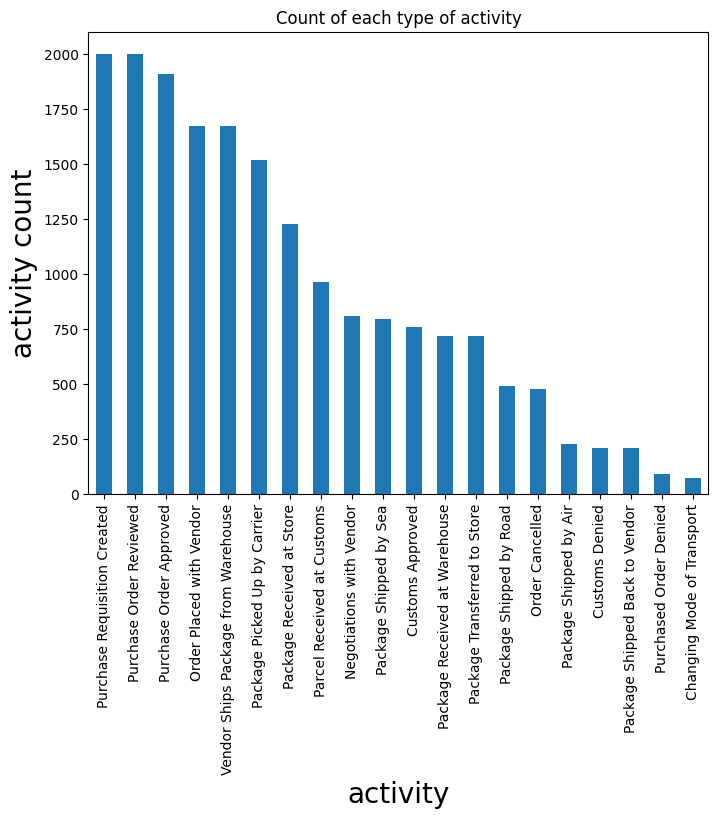

In [5]:
# Visualize the distribution:
activity_plot = activity_records['Activity Name'].value_counts().plot.bar(title='Count of each type of activity', figsize=(8,6))
activity_plot.set_xlabel('activity', size = 20)
activity_plot.set_ylabel('activity count', size = 20)

plt.show()

In [6]:
fig = go.Figure(data=go.Scatterpolar(
  r = activity_records['Activity Name'].value_counts(),
  theta = activity_records['Activity Name'].value_counts().index,
  fill='toself'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True
     ),
    ),
    showlegend=False,
    title_text="Radar Chart by activity",
    autosize=True
)

fig.show()

Now sort the dataset by cases and observe how much emission will generate by activities generally.

In [7]:
activity_records_num = activity_records.replace(dict(activity_emission.itertuples(False, None)))
activity_records_num = activity_records_num.rename({'Activity Name':'Activity emission'}, axis = 1)
activity_records_num.head()

is_numeric_dtype(activity_records_num['Activity emission'])
activity_records_num['Activity emission'] = activity_records_num[['Activity emission']].apply(pd.to_numeric)
is_numeric_dtype(activity_records_num['Activity emission'])

activity_records_case = activity_records_num.groupby('caseID').sum()
activity_records_case = activity_records_case.filter(items=['Activity emission'])
activity_records_case.head()

C:\Users\rocky\AppData\Local\Temp\ipykernel_33668\4078441673.py:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Activity emission
caseID,
1,4520.2
2,394.2
3,229.7
4,394.2
5,4500.2


Now we will visualize it to see the general tendency

(array([1.781e+03, 0.000e+00, 0.000e+00, 2.150e+02, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([3.000000e-01, 1.353240e+03, 2.706180e+03, 4.059120e+03,
        5.412060e+03, 6.765000e+03, 8.117940e+03, 9.470880e+03,
        1.082382e+04, 1.217676e+04, 1.352970e+04]),
 <BarContainer object of 10 artists>)

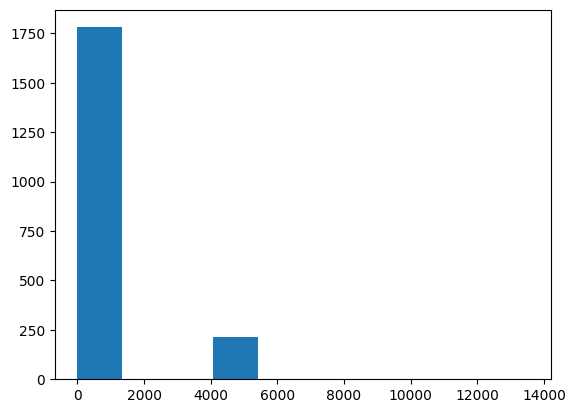

In [8]:
plt.hist(activity_records_case, bins = 10)

As we can see that, majority has emission produced below 2000, while there is a minority that generates emission more than 4000. It would be great to take a look at the minority to see details.

In [9]:
high_emission_cases = activity_records_case[activity_records_case['Activity emission'] > 4000]
high_emission_cases.head()

,Activity emission
caseID,
1,4520.2
5,4500.2
28,4520.2
30,4734.7
46,4500.7


Now we will use the filtered `caseID` to retrieve their activities, and visualize to see which activities are the main factors that cause the heavy emission.

In [10]:
#

Cases approved and denied by customs, and corresponding emissions.

In [42]:
activity_records_filtered = activity_records[activity_records['Activity Name'].isin(["Customs Approved", "Customs Denied"])]
activity_records_filtered = activity_records_filtered.filter(items=["caseID", "Activity Name"])
activity_records_filtered

,caseID,Activity Name
9,1,Customs Approved
32,3,Customs Approved
55,5,Customs Approved
65,6,Customs Approved
87,9,Customs Approved
...,...,...
18441,1994,Customs Approved
18452,1995,Customs Approved
18469,1997,Customs Approved
18486,1999,Customs Approved


Text(0, 0.5, 'Case count')

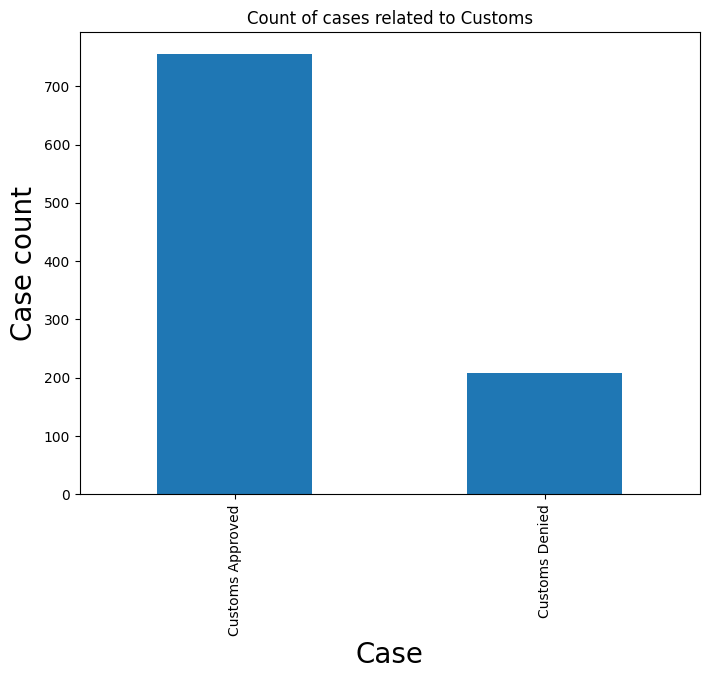

In [37]:
activity_plot = activity_records_filtered['Activity Name'].value_counts().plot.bar(title='Count of cases related to Customs', figsize=(8,6))
activity_plot.set_xlabel('Case', size = 20)
activity_plot.set_ylabel('Case count', size = 20)

In [38]:
casecol = activity_records_filtered['caseID'].unique()
activity_table = pd.read_csv("../cases_data/case_table.csv", decimal=',')
activity_table_filtered = activity_table[activity_table['caseID'].isin(casecol)]
activity_filtered_table = activity_table_filtered.filter(items=['caseID', 'Amount Ordered'])
activity_filtered_table

,caseID,Amount Ordered
0,1,13.64910965
2,3,18.23135133
4,5,26.65683587
5,6,125.8339762
8,9,8.793888451
...,...,...
1993,1994,18.97562434
1994,1995,33.06241635
1996,1997,27.66439809
1998,1999,20.67540994


In [50]:
customs_table = pd.merge(activity_filtered_table, activity_records_filtered)
customs_table

,caseID,Amount Ordered,Activity Name
0,1,13.64910965,Customs Approved
1,3,18.23135133,Customs Approved
2,5,26.65683587,Customs Approved
3,6,125.8339762,Customs Approved
4,9,8.793888451,Customs Approved
...,...,...,...
958,1994,18.97562434,Customs Approved
959,1995,33.06241635,Customs Approved
960,1997,27.66439809,Customs Approved
961,1999,20.67540994,Customs Approved


In [53]:
customs_table['Amount Ordered'] = customs_table['Amount Ordered'].astype(float)
customs_pollution = customs_table.groupby("Activity Name")['Amount Ordered'].sum()
customs_pollution

Activity Name
Customs Approved    27467.784485
Customs Denied       6982.811913
Name: Amount Ordered, dtype: float64

In [57]:
denied_pollution = customs_pollution*(2.5+185)
denied_pollution

Activity Name
Customs Approved    5.150210e+06
Customs Denied      1.309277e+06
Name: Amount Ordered, dtype: float64